<a href="https://colab.research.google.com/github/hemankundu/indian-currency-recognizer/blob/master/currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pytest-shutil

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
#from shutil import copy
import shutil
from random import shuffle
import tensorflow as tf
import tensorflow.keras.preprocessing as prep
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [0]:
drive_path = '/content/drive/My Drive/colab/currency/'
data_dir = drive_path + "dataset/"
classes = os.listdir(data_dir)

FileNotFoundError: ignored

In [0]:
classes

['fifty', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']

In [0]:
#unzip and copy dataset to drive
!unzip -q {drive_path + 'currency_dataset.zip'} {drive_path}
#!cp -r dataset {drive_path}

In [0]:
if not os.path.exists('/tmp/currency'):
  os.mkdir('/tmp/currency')
training_dir = '/tmp/currency/training/'
testing_dir = '/tmp/currency/testing/'
dev_dir = '/tmp/currency/dev/'
dirs = [training_dir, dev_dir, testing_dir]
for dir_ in dirs:
  if not os.path.exists(dir_):
    os.mkdir(dir_)
  for cls in classes:
    cls_dir = dir_ + cls
    if not os.path.exists(cls_dir):
      os.mkdir(cls_dir)


In [0]:
training_dir = drive_path + 'tmp/currency/training/'
testing_dir = drive_path + 'tmp/currency/testing/'
dev_dir = drive_path + 'tmp/currency/dev/'
dirs = [training_dir, dev_dir, testing_dir]

In [0]:
def split_data(data_dir, training_dir, dev_dir, testing_dir, split):
  dirs = [training_dir, dev_dir, testing_dir]
  if sum(split) > 1.0:
    print('Invalid split')
    return
  for cls in classes:
    data = os.listdir(data_dir + cls)
    shuffle(data)
    i = 0
    for dir_, sp in zip(dirs, split):
      for _ in range(int(len(data)*sp)):
        shutil.copy(data_dir + cls + '/' + data[i], dir_+ cls)
        if int(len(data)/(i+1))%5 == 0:
          print(int(len(data)/(i+1)))
        i += 1


In [0]:
split_data(data_dir, training_dir, dev_dir, testing_dir, [.8, .2, 0.])

In [0]:
import os, glob, shutil

def make_dir(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def copy_dir(source_item, destination_item):
    if os.path.isdir(source_item):
        make_dir(destination_item)
        sub_items = glob.glob(source_item + '/*')
        for sub_item in sub_items:
            copy_dir(sub_item, destination_item + '/' + sub_item.split('/')[-1])
    else:
      try:
        shutil.copy(source_item, destination_item)
      except Exception:
        pass

copy_dir("/tmp", drive_path+'tmp')

In [0]:
for dir_ in dirs:
  #print(dir_, len(os.listdir(dir_)))
  for cls in classes:
    print(dir_ + cls, len(os.listdir(dir_ + cls)))

In [0]:
dim = 256

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(horizontal_flip=True , shear_range = 0.2, fill_mode='nearest' , brightness_range=(0.01, 0.08), rescale=1.0/255.0, 
                                      rotation_range=40, width_shift_range= 0.1, height_shift_range=0.1, zoom_range=0.1)
train_generator = train_datagen.flow_from_directory(training_dir, target_size=(dim, dim), batch_size=64)
dev_datagen = ImageDataGenerator(horizontal_flip=True , shear_range = 0.2, fill_mode='nearest' , brightness_range=(0.01, 0.08), rescale=1.0/255.0, 
                                      rotation_range=40, width_shift_range= 0.1, height_shift_range=0.1, zoom_range=0.1)
dev_generator = dev_datagen.flow_from_directory(dev_dir, target_size=(dim, dim), batch_size=64)
test_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=40, width_shift_range= 0.1, height_shift_range=0.1, zoom_range=0.1 )
test_generator = test_datagen.flow_from_directory(dev_dir, target_size=(dim, dim), batch_size=64)



Found 2054 images belonging to 6 classes.
Found 512 images belonging to 6 classes.
Found 512 images belonging to 6 classes.


In [0]:
from tensorflow.keras import regularizers
l2 = 0.01
built_model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, 3, padding='same', kernel_regularizer=regularizers.l2(l2 ), activation='relu', input_shape=(dim, dim, 3)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(), 
tf.keras.layers.Conv2D(64, 3, padding='same', kernel_regularizer=regularizers.l2(l2), activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(),  
tf.keras.layers.Conv2D(64, 3, padding='same', kernel_regularizer=regularizers.l2(l2), activation='relu'),
tf.keras.layers.Dropout(rate=0.2),
tf.keras.layers.Conv2D(64, 3, padding='same', kernel_regularizer=regularizers.l2(l2), activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(), 
tf.keras.layers.Dropout(rate=0.2),
tf.keras.layers.Conv2D(128, 3, kernel_regularizer=regularizers.l2(l2), activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(), 
tf.keras.layers.Dropout(rate=0.2), 
tf.keras.layers.Conv2D(256, 3, kernel_regularizer=regularizers.l2(l2), activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(), 
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(6, activation='softmax'),          
])

built_model.compile(optimizer=Adam(learning_rate=0.0001) , loss='categorical_crossentropy', metrics=['acc'])

In [0]:
built_model.summary()

In [0]:
model_name = "cnn_l2_1"

In [0]:
with open(drive_path + model_name + ".json", "w") as f:
  f.write(built_model.to_json())

In [0]:
json_file = open(drive_path + model_name + ".json", 'r')
loaded_model_json = json_file.read()
json_file.close()
built_model = tf.keras.models.model_from_json(loaded_model_json)

In [0]:
saved_version = "full"
loaded_model = tf.keras.models.load_model(drive_path + model_name + '_'+ saved_version +'.h5')
for layer_loaded, layer_built in zip(loaded_model.layers, built_model.layers):
   layer_built.set_weights(layer_loaded.get_weights())
#loaded_model.summary()
#model.load_weights(drive_path + 'model3.h5')

In [0]:
checkpoint = callbacks.ModelCheckpoint(drive_path + model_name +'_auto.h5', monitor='loss', verbose=1, save_best_only=False, mode='min', overwrite=True)
callbacks_list = [checkpoint]

In [0]:
history = built_model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=test_generator,
                              callbacks=callbacks_list)

Epoch 1/5


InvalidArgumentError: ignored

In [0]:
built_model.save(drive_path + model_name + '_full.h5')
built_model.save_weights(drive_path + model_name + '_w.h5')

Text(0.5, 1.0, 'Training and validation loss')

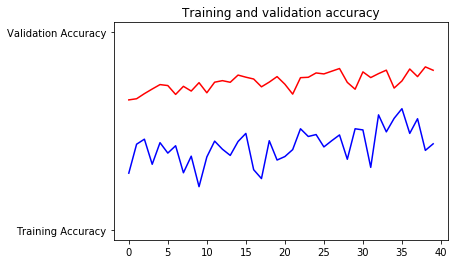

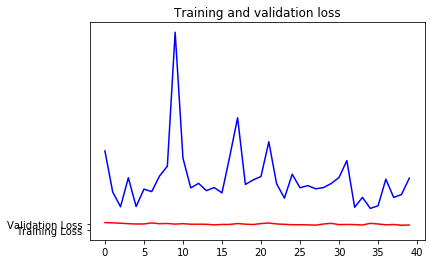

In [0]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [0]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(dim, dim))
  x = image.img_to_array(img)
  x = x/255.0
  x = np.expand_dims(x, axis=0)
  #print(x)
  #images = np.vstack([x])
  prediction = built_model.predict(x)
  prediction = prediction[0]
  bestclass = 0
  for n in range(len(classes)):
    if (prediction[n] > prediction[bestclass]):
      bestclass = n
  print('\nI think this is a ' + classes[bestclass] + ' with ' + str(prediction[bestclass] * 100) + '% confidence.')
  #print("I think this is a ", classes[prediction.index(max(prediction))])
  

Saving 101.jpg to 101 (1).jpg

I think this is a thousand with 99.99662637710571% confidence.


In [0]:
classes

['fifty', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']